# Loading the audio file

In [2]:
import librosa
x, sr = librosa.load('../data/donald_trump.wav')

/opt/miniconda3/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/opt/miniconda3/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [5]:
print(x.shape)
print(sr)

(1804490,)
22050


# Plotting a Waveform

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

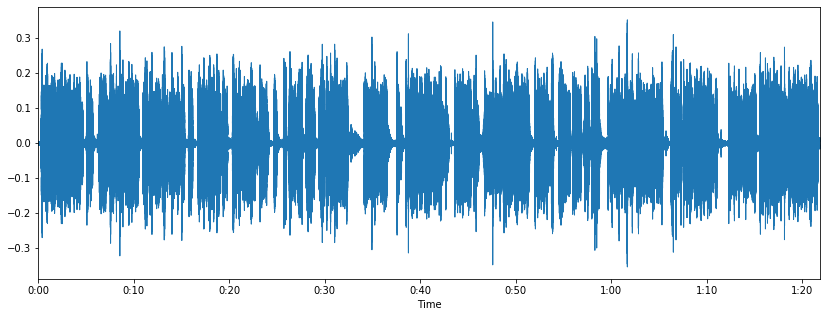

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

## Above is the plot of the entire audio, let's just trim the first 4 seconds-- roughly the first sentence

In [8]:
x_first_sentence = x[0:int(4 * sr)]

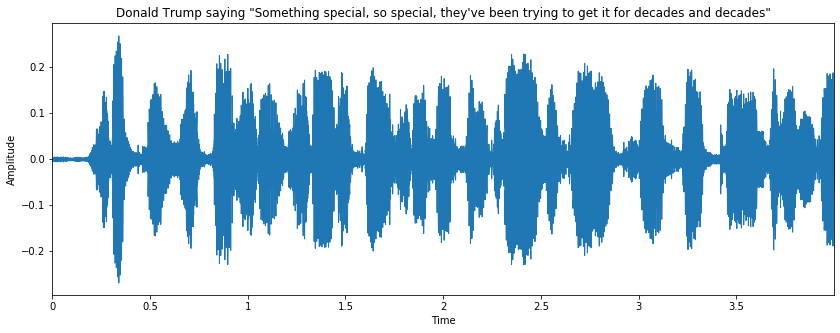

In [20]:
plt.figure(figsize=(14, 5))
plt.title('Donald Trump saying "Something special, so special, they\'ve been trying to get it for decades and decades"')
plt.ylabel('Amplitude')
librosa.display.waveplot(x_first_sentence, sr=sr)

In [21]:
import numpy as np

In [22]:
x_filt = librosa.effects.preemphasis(x_first_sentence)

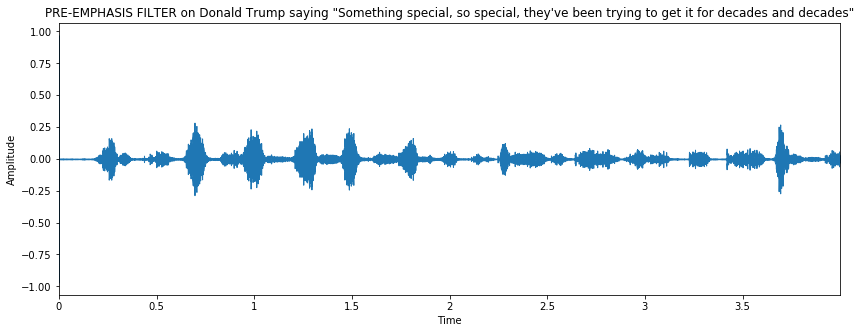

In [23]:
plt.figure(figsize=(14, 5))
plt.title('PRE-EMPHASIS FILTER on Donald Trump saying "Something special, so special, they\'ve been trying to get it for decades and decades"')
plt.ylabel('Amplitude')
librosa.display.waveplot(x_filt, sr=sr)

# Spectrogram

In [46]:
S = np.abs(librosa.stft(x_filt))

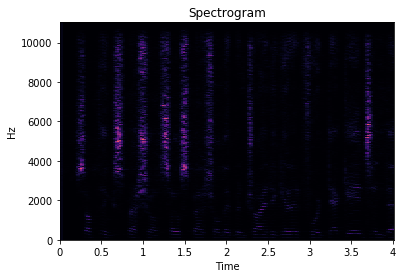

In [54]:
plt.title('Spectrogram')
librosa.display.specshow(S, x_axis='time', y_axis='hz')

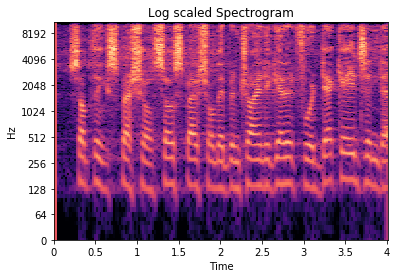

In [55]:
plt.title('Log scaled Spectrogram')
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max), x_axis='time', y_axis='log')

# Mel Spectrogram

In [49]:
S_mel = librosa.feature.melspectrogram(x_filt)

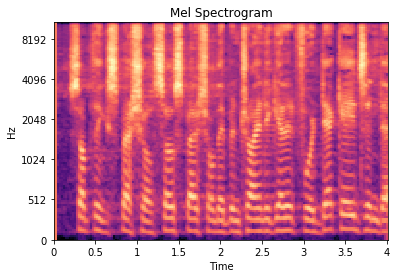

In [56]:
plt.title('Mel Spectrogram')
librosa.display.specshow(librosa.power_to_db(S_mel, ref=np.max), x_axis='time', y_axis='mel')